First we're going to import the pandas library, a very powerful library used by data scientist and analysts to manipulate, preprocess data and eventually use for machine learning and visualization. We will also bring in seaborn for our last transformation

In [163]:
import pandas as pd
import seaborn as sns

Next we're going to import the data file. If your file is a csv you can import the file using pd.read_csv otherwise leave it as read_excel for xls files. This will import all your data and create a dataframe. If an index is not specified if will insert an index starting at 0, however you can adjust the index to start wherever you want or use a column name as an index

In [170]:
df=pd.read_excel('data.xls') 

Next you will notice that price prints in scientific notation (float64) so we have to convert it to (int64)

In [173]:
df['price']=df['price'].astype('int64')
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000,3,2,1340,7912,2,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000,5,2,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000,3,2,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000,3,2,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000,4,2,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
5,2014-05-02,490000,2,1,880,6380,1,0,0,3,880,0,1938,1994,522 NE 88th St,Seattle,WA 98115,USA
6,2014-05-02,335000,2,2,1350,2560,1,0,0,3,1350,0,1976,0,2616 174th Ave NE,Redmond,WA 98052,USA
7,2014-05-02,482000,4,2,2710,35868,2,0,0,3,2710,0,1989,0,23762 SE 253rd Pl,Maple Valley,WA 98038,USA
8,2014-05-02,452500,3,2,2430,88426,1,0,0,4,1570,860,1985,0,46611-46625 SE 129th St,North Bend,WA 98045,USA
9,2014-05-02,640000,4,2,1520,6200,2,0,0,3,1520,0,1945,2010,6811 55th Ave NE,Seattle,WA 98115,USA


TRANSFORMATION #1: 

Let's view some statistics on this dataset. 

In [174]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4600,4600,4600,4600,4600,4600,4600,4600,4600,4600,4600,4600,4600
mean,551963,3,2,2139,14853,2,0,0,3,1827,312,1971,809
std,563835,1,1,963,35884,1,0,1,1,862,464,30,979
min,0,0,0,370,638,1,0,0,1,370,0,1900,0
25%,322875,3,2,1460,5001,1,0,0,3,1190,0,1951,0
50%,460943,3,2,1980,7683,2,0,0,3,1590,0,1976,0
75%,654962,4,2,2620,11001,2,0,0,4,2300,610,1997,1999
max,26590000,9,8,13540,1074218,4,1,4,5,9410,4820,2014,2014


TRANSFORMATION #2:

Now lets derive a calculated field called price per sq ft in excel and in pandas and sort by the derived field in descending order

In [179]:
df['price_sqft']=df['price']/df['sqft_lot']
df=df.sort_values(by=['price_sqft'], ascending=False)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_sqft
4350,2014-07-03,26590000,3,2,1180,7793,1,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,USA,3412
4465,2014-06-05,2560498,3,2,1710,1664,2,0,0,5,1300,410,2003,0,2826 21st Ave W,Seattle,WA 98199,USA,1539
4346,2014-06-23,12899000,3,2,2190,11394,1,0,0,3,1550,640,1956,2001,5426 40th Ave W,Seattle,WA 98199,USA,1132
1913,2014-06-04,742000,3,3,1540,704,3,0,0,3,1540,0,2011,0,1820 E Howell St,Seattle,WA 98122,USA,1054
3608,2014-06-27,516500,1,1,1100,638,3,0,0,3,1100,0,2014,0,416 19th Ave E,Seattle,WA 98112,USA,810


TRANSFORMATION #3:

Find the count of sales and mean price in each city by bedroom. We will accomplish this by plotting a pivot table

In [190]:
dfpiv=pd.pivot_table(df,index=['city'], values=['price', 'price'], columns=['bedrooms'], aggfunc=['count','mean'], fill_value=0)
dfpiv.head()

count                                   ...  mean         \
                   price                                   ... price          
bedrooms               0  1   2    3    4   5  6  7  8  9  ...     0      1   
city                                                       ...                
Algona                 0  0   1    2    2   0  0  0  0  0  ...     0      0   
Auburn                 0  1  13   85   69   5  2  1  0  0  ...     0 115000   
Beaux Arts Village     0  0   0    1    0   0  0  0  0  0  ...     0      0   
Bellevue               0  0   7  102  125  46  4  2  0  0  ...     0      0   
Black Diamond          0  0   1    5    3   0  0  0  0  0  ...     0      0   

                                                                       
                                                                       
bedrooms                2      3      4       5      6        7  8  9  
city                                                                   
Algona             100000 213220 255000       0      0        0  0  0  
Auburn             245892 269468 347037  336400 280000   280000  0  0  
Beaux Arts Village      0 745000      0       0      0        0  0  0  
Bellevue           808300 667054 921050 1039571 851375  1119500  0  0  
Black Diamond      398000 295390 393833       0      0        0  0  0  

[5 rows x 40 columns]

TRANSFORMATION #4:

Now let's append the average 5 year appreciation rate by city using a vlookup in excel and similar in pandas


In [193]:
df_appre=pd.read_excel('data.xls', sheet_name='city_AA')
results=df.merge(df_appre, on='city')
results.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_sqft,Avg_Appre
0,2014-07-03,26590000,3,2,1180,7793,1,0,0,4,1180,0,1992,0,12005 SE 219th Ct,Kent,WA 98031,USA,3412,10
1,2014-07-10,355000,3,2,2110,4038,2,0,0,4,2110,0,1989,0,23884 140th Ln SE,Kent,WA 98042,USA,88,10
2,2014-07-08,245000,3,2,1600,2788,2,0,0,4,1600,0,1992,0,11539 SE 221st Pl,Kent,WA 98031,USA,88,10
3,2014-07-08,293000,3,2,1910,3481,2,0,0,3,1910,0,2009,0,19358 114th Pl SE,Kent,WA 98031,USA,84,10
4,2014-06-23,345950,3,2,2110,4118,2,0,0,3,2110,0,1989,0,14150-14198 SE 238th Ln,Kent,WA 98042,USA,84,10


In [197]:
results.loc[results['city']=='Medina'].head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_sqft,Avg_Appre
3402,2014-07-08,2458000,4,5,6500,14986,2,0,0,3,5180,1320,2001,0,2205 78th Ave NE,Medina,WA 98039,USA,164,-4
3403,2014-05-30,3710000,4,4,5550,28078,2,0,2,4,3350,2200,2000,0,3222 78th Pl NE,Medina,WA 98039,USA,132,-4
3404,2014-07-09,2680000,5,3,4290,20445,2,0,0,4,4290,0,1985,0,1209 Evergreen Point Rd,Medina,WA 98039,USA,131,-4
3405,2014-05-29,2750000,4,3,4430,21000,2,0,0,3,4430,0,1952,2007,3239 78th Pl NE,Medina,WA 98039,USA,131,-4
3406,2014-07-02,2271150,4,3,4040,18916,1,0,0,4,4040,0,1954,1979,7623 Overlake Dr W,Medina,WA 98039,USA,120,-4


TRANSFORMATION #5:

Plot the average price per sqft by bedroom using a bar graph

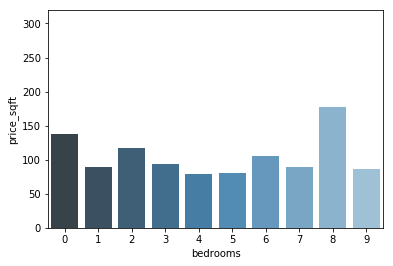

In [199]:
graph = sns.barplot(x='bedrooms', y='price_sqft', data=results, palette='Blues_d', errwidth=0)